In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/lupeguevara/Documents/Instacart Basket Analysis'

In [3]:
path

'/Users/lupeguevara/Documents/Instacart Basket Analysis'

In [4]:
#Import ords_prods_all dataframe

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer.pkl'))

In [5]:
ords_prods_cust_merge.shape

(32434212, 31)

In [6]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  Busiest day             object  
 14  Busy_slow_days          object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  average_price           float64 
 19  spending_flag           object  
 20  median_days             float64 
 21  order_

In [9]:
#Rename columns from 'order_dow' to 'orders_day_of_week'

ords_prods_cust_merge.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

<Axes: xlabel='orders_day_of_week'>

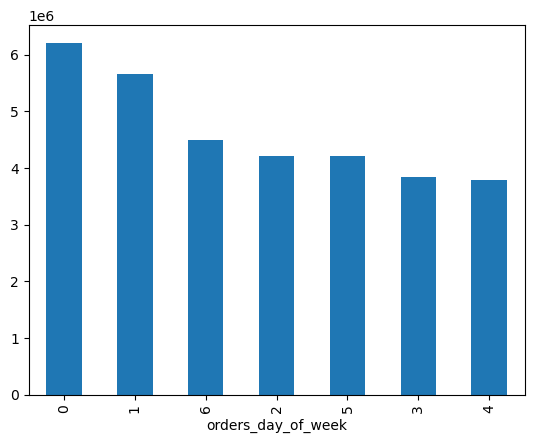

In [10]:
# Create bar chart for ords_prods_cust_merge

ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar()

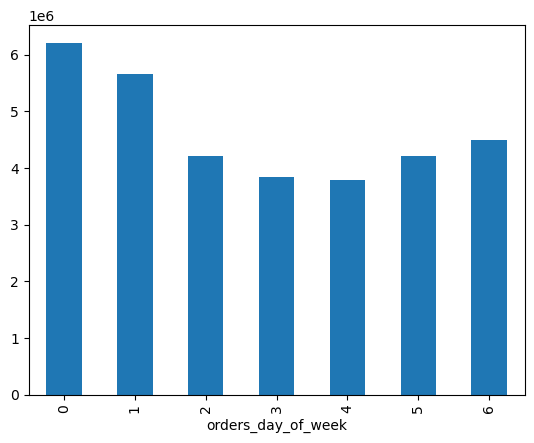

In [11]:
#Sort by index - days of the week in order

Bar = ords_prods_cust_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

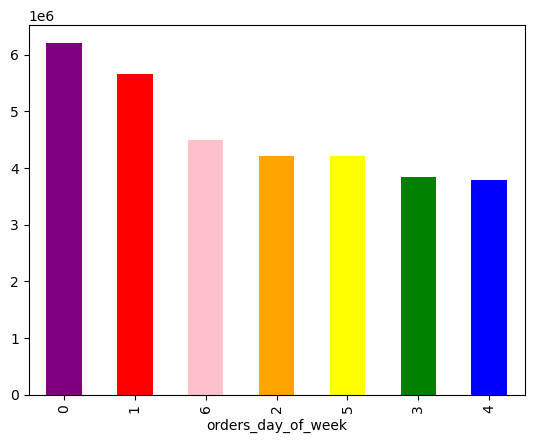

In [12]:
#Adding color to the bars

bar = ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [13]:
#Save visualizations

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_prods_cust.png'))

<Axes: ylabel='Frequency'>

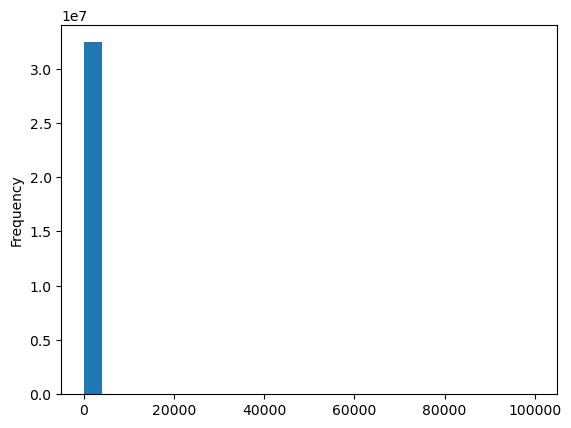

In [14]:
# Create a histogram for ords_prods_cust_merge

ords_prods_cust_merge['prices'].plot.hist(bins=25)

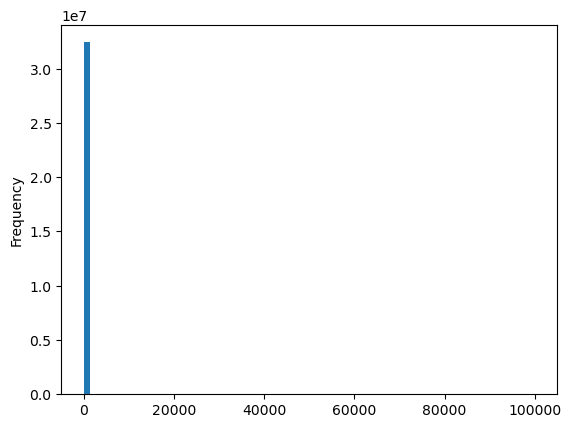

In [15]:
#  Increase the level of granularity in the histogram, simply increase the number of bins to 70.

hist = ords_prods_cust_merge['prices'].plot.hist(bins=70)

In [16]:
# Export the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_prods_merge.png'))

In [17]:
#Create a subset of the dataframe

df = ords_prods_cust_merge[:2000000]

In [18]:
df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1333908,6990,11,2,16,7.0,23909,4,1,2% Reduced Fat Milk,...,Regular customer,Victor,Burke,Male,Arizona,38,3,married,69093,both
1999996,339010,6990,19,0,9,7.0,23909,4,1,2% Reduced Fat Milk,...,Regular customer,Victor,Burke,Male,Arizona,38,3,married,69093,both
1999997,2868574,6990,20,3,17,17.0,23909,6,1,2% Reduced Fat Milk,...,Regular customer,Victor,Burke,Male,Arizona,38,3,married,69093,both
1999998,2559132,6990,22,6,11,20.0,23909,4,1,2% Reduced Fat Milk,...,Regular customer,Victor,Burke,Male,Arizona,38,3,married,69093,both


In [19]:
#Create the seed

np.random.seed(4)

In [20]:
#Create a list holding True/False values to test the np.random.rand () <= 0.7

dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [21]:
dev

array([False,  True, False, ..., False,  True,  True])

In [22]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [23]:
#Store 70% of the sample in the dataframe big

big = ords_prods_cust_merge[dev]

In [24]:
#Store 30% of the sample in the dataframe small

small = ords_prods_cust_merge[~dev]

In [25]:
len(ords_prods_cust_merge)

32434212

In [26]:
len(big) + len(small)

32434212

In [27]:
df_2 = small[['orders_day_of_week', 'prices']]

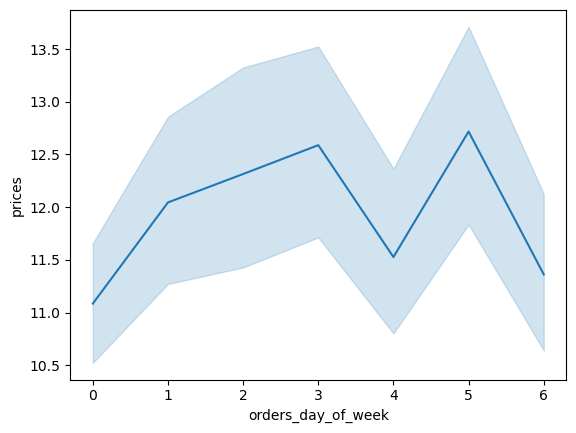

In [29]:
#Create Line Chart for the 30% sample

line = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

In [30]:
#Exporting the line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ords_prods_cust.png'))

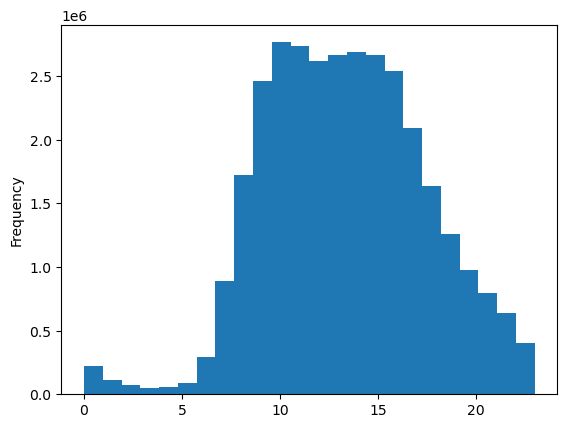

In [32]:
#Create a histogram of the hour_of_day_ordered column

hist_hour_of_day_ordered = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins=24)

In [35]:
#Export the histogram

hist_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_prods_cust.png'))

### The histogram demonstrates that the least busy times are from 1am - 6am. The peak hours for orders are from approximately 9am - 6pm. After 5pm, orders start to decline and each subsequent hour after, continues to steadily decline. 

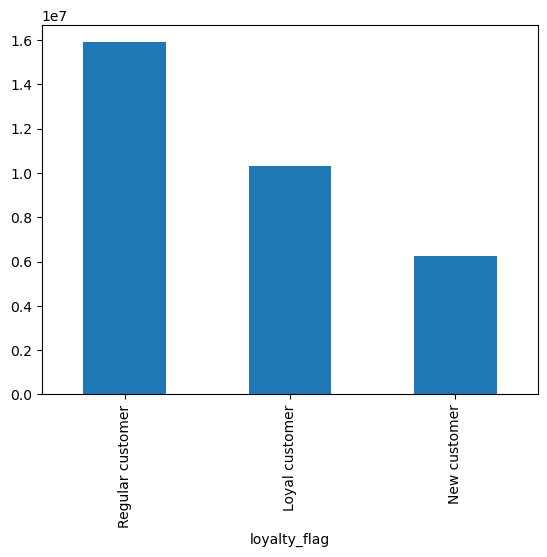

In [36]:
#Create a bar chart from the loyalty_flag column

bar_loyalty_flag = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

In [37]:
#Check if there is a difference in expenditures depending on the hour of the day

In [38]:
#Create the seed

np.random.seed(4)

In [39]:
#Create a list holding True/False values to test the np.random.rand () <= 0.7

dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [40]:
dev

array([False,  True, False, ..., False,  True,  True])

In [41]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [42]:
#Store 70% of the sample in the dataframe big

big = ords_prods_cust_merge[dev]

In [43]:
#Store 30% of the sample in the dataframe small

small = ords_prods_cust_merge[~dev]

In [44]:
len(ords_prods_cust_merge)

32434212

In [45]:
len(big) + len(small)

32434212

In [46]:
df_3 = small[['order_hour_of_day', 'prices']]

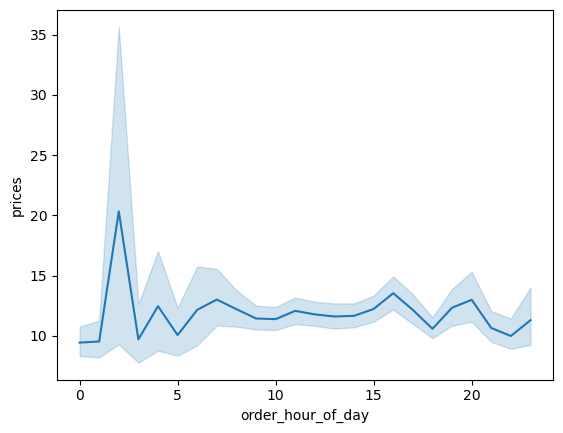

In [47]:
#Create Line Chart for the 30% sample

line_order_hour_of_day = sns.lineplot(data = df_3, x='order_hour_of_day', y='prices')

In [48]:
#Exporting the line chart

line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_ords_prods_cust.png'))

In [49]:
#Check if there is a connection between age and number dependants

In [50]:
#Create the seed

np.random.seed(4)

In [51]:
#Create a list holding True/False values to test the np.random.rand () <= 0.7

dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [52]:
dev

array([False,  True, False, ..., False,  True,  True])

In [53]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [54]:
#Store 70% of the sample in the dataframe big

big = ords_prods_cust_merge[dev]

In [55]:
#Store 30% of the sample in the dataframe small

small = ords_prods_cust_merge[~dev]

In [56]:
len(ords_prods_cust_merge)

32434212

In [57]:
len(big) + len(small)

32434212

In [58]:
df_4 = small[['number_of_dependents', 'age']]

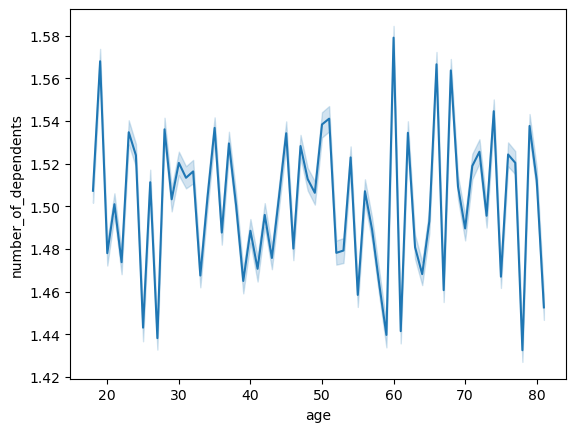

In [59]:
#Create Line Chart for the 30% sample

line_number_of_dependents=sns.lineplot(data=df_4, x='age', y='number_of_dependents')

### The line chart does not show a correlation between age and number of dependants.

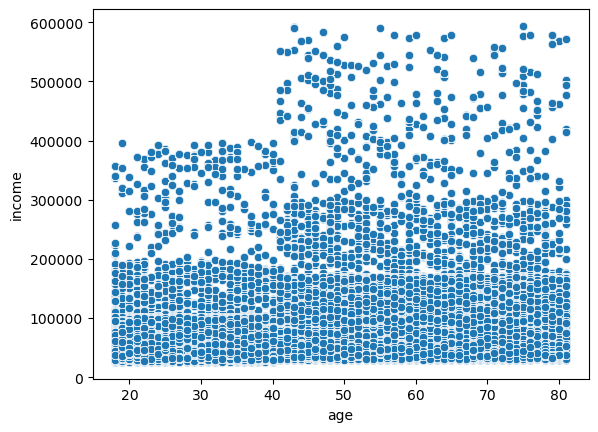

In [60]:
#Create a scatterplot to see if there is a connection between age and income

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust_merge)

In [61]:
#Exporting the scatterplot

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_ords_prods_cust.png'))

### Observing the scatterplot indicates that a highest density of income across all ages is between $0 - $200,000. The next highest income bracket is from $200,000 - $300,000 among 40+ age group. Also, there are income values from $200,000 - $400,000 across all age ranges. Finally, the income values of $300,000 - $600,000 are scattered across the 40+ age ranges. Ages between 18 to 40 have lower spending power compared to above 40. 